In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
import numpy as np

In [2]:
# Exactly like numpy arange - equally spaced numbers from 0 to 5
t = torch.arange(6, dtype=torch.float32)
# Create a Dataloader object (iterable)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

# This can also be done with batches of data
# The drop last is useful when the number of data points is not divisible by the batch size
data_loader = DataLoader(t, batch_size=3, drop_last=False)
print("\nIn batches of size 3:")
for i, batch in enumerate(data_loader):
    print(f"Batch {i}: {batch}")

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])

In batches of size 3:
Batch 0: tensor([0., 1., 2.])
Batch 1: tensor([3., 4., 5.])


In [3]:
# We can also create custom dataset classes - e.g. pushing feature and target variables together
X = torch.rand([4, 3], dtype=torch.float32)
y = torch.arange(4)

class JointDataset(Dataset):
    def __init__(self, x, y) -> None:
       self.x = x
       self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

joint_dataset = JointDataset(X, y)
print("Using the custom JointDataset object:")
for example in joint_dataset:
    print(f"x: {example[0]}, y: {example[1]}")

# As an alternative, if the datapoints are already tensors, we can simply use TensorDataset
joint_dataset = TensorDataset(X, y)
print("\nUsing the TensorDataset object:")
for example in joint_dataset:
    print(f"x: {example[0]}, y: {example[1]}")

Using the custom JointDataset object:
x: tensor([0.6645, 0.2252, 0.1974]), y: 0
x: tensor([0.9348, 0.9682, 0.9660]), y: 1
x: tensor([0.5792, 0.6572, 0.2393]), y: 2
x: tensor([0.8805, 0.5768, 0.5360]), y: 3

Using the TensorDataset object:
x: tensor([0.6645, 0.2252, 0.1974]), y: 0
x: tensor([0.9348, 0.9682, 0.9660]), y: 1
x: tensor([0.5792, 0.6572, 0.2393]), y: 2
x: tensor([0.8805, 0.5768, 0.5360]), y: 3


In [4]:
# Shuffling before creating batches is also possible with dataloaders
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for epoch in range(2):
    print(f"Epoch {epoch + 1}")
    for i, batch in enumerate(data_loader, 1):
        print(f"Batch {i} - x: {batch[0]}, y: {batch[1]}")

Epoch 1
Batch 1 - x: tensor([[0.6645, 0.2252, 0.1974],
        [0.5792, 0.6572, 0.2393]]), y: tensor([0, 2])
Batch 2 - x: tensor([[0.9348, 0.9682, 0.9660],
        [0.8805, 0.5768, 0.5360]]), y: tensor([1, 3])
Epoch 2
Batch 1 - x: tensor([[0.6645, 0.2252, 0.1974],
        [0.8805, 0.5768, 0.5360]]), y: tensor([0, 3])
Batch 2 - x: tensor([[0.9348, 0.9682, 0.9660],
        [0.5792, 0.6572, 0.2393]]), y: tensor([1, 2])


In [5]:
# Data can also be extracted from local storage
import pathlib
import os
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']
Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


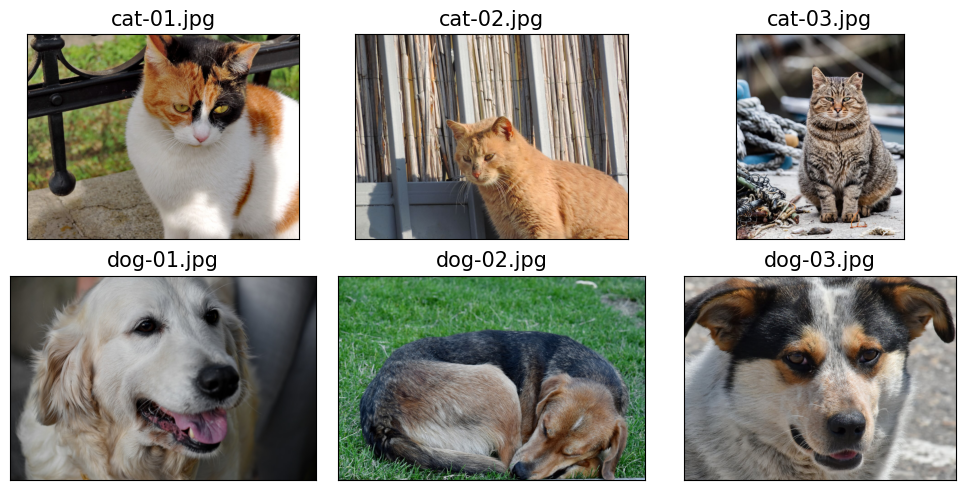

In [6]:
img_dir = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in img_dir.glob('*.jpg')])
print(file_list)

fig = plt.figure(figsize=(10,5))

labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)

    ax = fig.add_subplot(2, 3, i+1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [7]:
# We can now transform these images to create a standard torch tensor to work with
img_height, img_width = 80, 120

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width)),])

In [12]:
class ImageDataset(Dataset):
    def __init__(self, file_list: list, labels: list, transform=None) -> None:
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list=file_list, labels=labels, transform=transform)

for file, label in image_dataset:
    print(file, label)

tensor([[[0.6967, 0.7033, 0.6508,  ..., 0.2820, 0.2384, 0.4573],
         [0.7066, 0.7229, 0.7009,  ..., 0.0947, 0.0898, 0.1647],
         [0.7364, 0.7224, 0.6130,  ..., 0.1539, 0.1851, 0.2184],
         ...,
         [0.5537, 0.5035, 0.4819,  ..., 0.9661, 0.9823, 0.9797],
         [0.5314, 0.5222, 0.4911,  ..., 0.9584, 0.9727, 0.9733],
         [0.4952, 0.5050, 0.4978,  ..., 0.9466, 0.9592, 0.9688]],

        [[0.6422, 0.6501, 0.5975,  ..., 0.2774, 0.2265, 0.4577],
         [0.6671, 0.6842, 0.6539,  ..., 0.0902, 0.0827, 0.1524],
         [0.7035, 0.6799, 0.5444,  ..., 0.1423, 0.1717, 0.2013],
         ...,
         [0.5065, 0.4522, 0.4161,  ..., 0.9258, 0.9462, 0.9447],
         [0.4815, 0.4723, 0.4349,  ..., 0.9217, 0.9406, 0.9438],
         [0.4453, 0.4580, 0.4479,  ..., 0.9112, 0.9286, 0.9414]],

        [[0.5703, 0.5756, 0.5180,  ..., 0.2868, 0.2094, 0.3552],
         [0.5845, 0.6043, 0.5663,  ..., 0.0985, 0.0831, 0.1519],
         [0.6299, 0.5919, 0.4390,  ..., 0.1446, 0.1745, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0005550324..1.0000002].


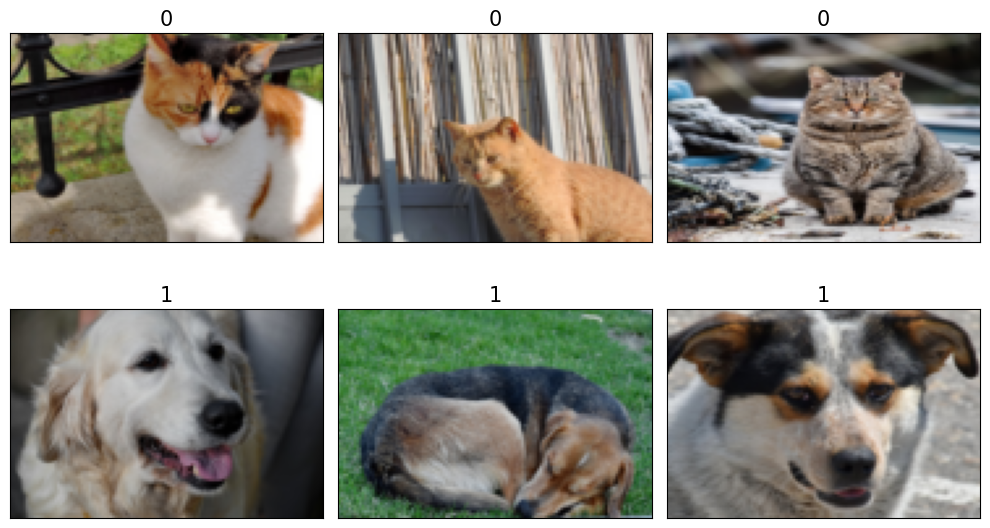

In [13]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()